### Simultaneous write and read


We monitor the `Directory` called "NetworkDir_0000" from `01. Introduction to Datamate` to see how the training progresses.

In [1]:
from pathlib import Path
from time import sleep

import numpy as np
import matplotlib.pyplot as plt

import datamate

root_dir = Path(".") / 'data'
datamate.set_root_dir(root_dir)

In [2]:
# we instantiate a pointer to the Directory
tnn = datamate.Directory('NetworkDir_0000')

In [3]:
# we can visualize the loss to monitor the training

def watch_loss(tnn):
    fig = plt.figure()
    ax = plt.subplot()
    ax.plot(tnn.loss[:])
    ax.set_xlabel("iteration")
    ax.set_ylabel("loss")

    def update_loss(loss):
        iters = np.arange(0, len(loss))
        ax.lines[0].set_data(iters, loss)
        if loss.any():
            ymax = np.max(loss)
            ymin = np.min(loss)
        ax.axis([0, iters[-1], ymin, ymax])

    while True:
        loss = tnn.loss[:]
        update_loss(loss)
        fig.canvas.draw()
        fig.canvas.flush_events()
        sleep(0.125)

<IPython.core.display.Javascript object>


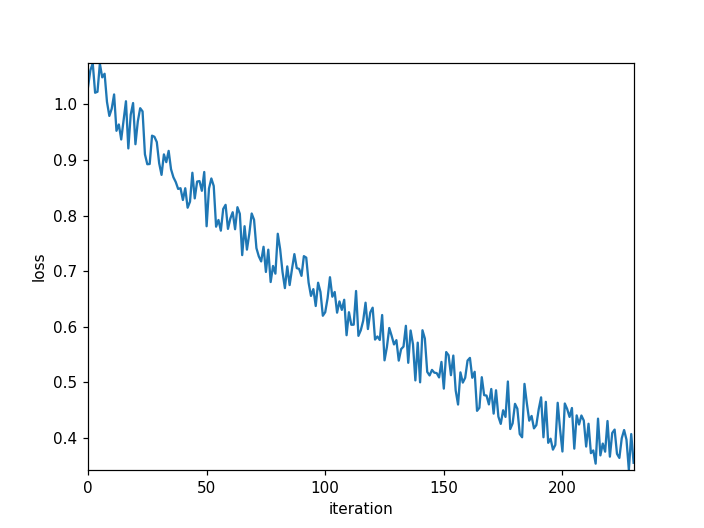

KeyboardInterrupt: 

In [4]:
%matplotlib notebook
watch_loss(tnn)